MachineLeaningCourse vol.12
# 特徴抽出・次元削減

### 主成分分析
主成分分析(Principal Component Analysis : PCA)はさまざまな分野にわったて広く使用されている教師無し線形変換法であり、最もよく用いられるタスクは次元削減である。

PCAは特徴量どうしの相関関係に基づいてデータからパターンを抽出するのに役立つ。簡単に言うと、PCAの目的は、高次元データにおいて分散が最大となる方向を見つけ出し、元の次元と同じかそれよりも低い次元の新しい部分空間へ射影することである。

以下の図に示すように、新しい特徴空間が互いに直行するという制約があるとすれば、新しい部分空間の直交軸（主成分）を分散が最大となる方向とみなすことができる。

![](https://s3.amazonaws.com/ai-standard/pic12-1.jpg)

要するに、データのばらつきである分散が大きいところ（＝主成分）を見つける。

簡単に、PCAのアルゴリズムを解説する。

1. 全データの重心を求める。（図②）
2. 重心から、データの分散が最大となる方向を見つける（図③）
3. 上記でとった軸と直交する方向に対して分散が最大となる方向を探す（図④）
4. 2~3を元のデータの次元数分だけ繰り返す。

![](https://s3.amazonaws.com/ai-standard/pic12-2.png)

PCAのポイントをまとめると、
#### データの特徴を抽出するのに役立つ
→ データのばらつきが大きい部分に着目することで、よりデータを識別しやすくする。

#### データの次元を圧縮できる
→　データのばらつきが少ない部分は、データに共通するパターンということなので、あまり意味をなさない。

#### 多次元特徴量の可視化に役立つ
→　多次元の特徴量では、可視化ができない。２，３次元まで落とすと、可視化することができるので、そのような使い方もできる。

In [1]:
# Iris データのインポート
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data[:,[2,3]], iris.target, test_size=0.3, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std =  scaler.transform(X_test)

/Users/tsuruoka/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


In [13]:
from matplotlib.colors import ListedColormap

# ２次元データの決定曲線をプロットする関数
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [48]:
# 「寄与率」　：　端的に言うと各種成分の重要性を表す
print(pca.explained_variance_ratio_)

# 「累積寄与率」　：　主成分の寄与率を足し合わせた物
#　選択した複数の守衛分によってせつめいできるデータの割合
print(np.cumsum(pca.explained_variance_ratio_))

[ 0.98426653  0.01573347]
[ 0.98426653  1.        ]


In [50]:
# 「因子負荷量」 
print(pca.components_)

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


![](https://s3.amazonaws.com/ai-standard/pic12-3.png)

データの値がどのように変わったか見ていきましょう。

In [43]:
import pandas as pd

#　PCA前
pd.DataFrame(X_train_std).head()

,0,1
0,-0.182950,-0.291459
1,0.930661,0.737219
2,1.042022,1.637313
3,0.652258,0.351465
4,1.097702,0.737219


In [53]:
# PCA後
pd.DataFrame(X_train_pca).head()

,0,1
0,-0.335458,-0.076727
1,1.179369,-0.136784
2,1.894576,0.420934
3,0.709739,-0.212693
4,1.297486,-0.254900


In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

/Users/tsuruoka/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


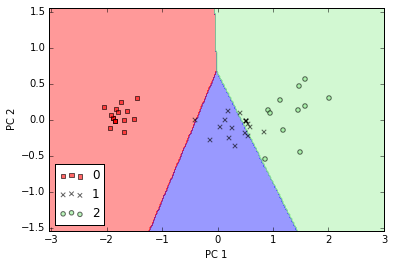

In [55]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()